<a href="https://colab.research.google.com/github/vadaliah/CS5260/blob/master/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq ipdb
import ipdb

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
%cd gdrive/My\ Drive/Colab\ Notebooks/hw1

/content/gdrive/My Drive/Colab Notebooks/hw1


In [6]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
food_truck_regr_data = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/hw1/food_truck_data.txt',delimiter=',')

In [6]:
# make up some initial thetas
theta_0 = 0.22
theta_1 = 0.86

In [7]:
# get example 0
x1, y = food_truck_regr_data[0]
x1, y

(6.1101, 17.592)

In [8]:
# use formula for linear regression to get output
y_hat = theta_0 + theta_1 * x1

In [9]:
# calculate basic error
error = y_hat - y
error

-12.117313999999999

In [10]:
# calculate cost
cost = 0.5 * (error ** 2)
cost

73.41464928729798

In [11]:
# new parameter - learning rate
alpha = 5e-3
alpha

0.005

In [16]:
# calculate update for theta 0
theta_0_new = theta_0 - alpha * (error) * 1
theta_0_new

0.28058657

In [15]:
# calculate update for theta 1
theta_1_new = theta_1 - alpha * (error) * x1
theta_1_new

1.230190001357

In [17]:
# do the update
theta_0 = theta_0_new
theta_1 = theta_1_new

In [19]:
def calculate_single_forward(thetas, train_ex):
    '''
        thetas: theta0, theta1, ..., thetaj
        train_ex: (x, y)
        
        returns: gradients based on a single training example
    '''

    # parse model parameters
    theta_0 = thetas[0]
    theta_1 = thetas[1]

    # parse data inputs
    x0 = 1
    x1 = train_ex[0]
    y = train_ex[1]

    # do one forward pass with a single training example
    # to calculate error and gradient
    y_hat = theta_0 + theta_1 * x1
    error = y_hat - y

    # for each theta, we need the gradient for an update
    gradients = np.array([error * x0, error * x1])

    # Question: what would you do differently for GD or mini-batch GD?

    return gradients

In [18]:
def gradient_descent(training_data, thetas, alpha=5e-3):
    '''
    training_data: training dataset
    thetas: theta0, theta1, ..., thetaj
    alpha: learning rate, default to 0.0005
    
    returns: 
            - thetas: the updated thetas
            - total_error: total error (note, not loss) from this iterat
    '''
    
    total_error = 0
    overall_gradients = np.zeros(2)

    # compute the summation of gradients across all training examples
    for ex in training_data:
        gradients = calculate_single_forward(thetas, ex)
        # gradients[0] is the error term (gradients[0] = error * x0 = er
        total_error += gradients[0]
        overall_gradients = overall_gradients + gradients

    # update thetas
    theta_0, theta_1 = thetas
    thetas[0] = theta_0 - alpha * overall_gradients[0]
    thetas[1] = theta_1 - alpha * overall_gradients[1]

    return thetas, total_error

In [20]:
# set initial parameters
thetas = [3.44, 2.13]
old_thetas = thetas.copy()
alpha = 5e-3

# prepare training
total_epochs = 100
error_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent(food_truck_regr_data, thetas, alpha)
    # store a history of errors
    error_traj[epoch] = epoch_error

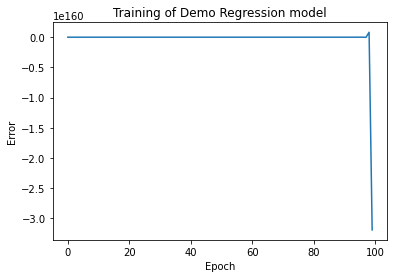

In [21]:
# Let's do an exploratory plot
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');

In [7]:
housing_price_regr_data = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/hw1/housing_price_data.txt',delimiter=',')
housing_price_regr_data

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

In [15]:
def calculate_single_forward_2(thetas, train_ex):
    '''
        thetas: theta0, theta1, ..., thetaj
        train_ex: (x, y)
        
        returns: gradients based on a single training example
    '''

    # parse model parameters
    theta_0 = thetas[0]
    theta_1 = thetas[1]
    theta_2 = thetas[2]

    # parse data inputs
    x0 = 1
    x1 = train_ex[0]
    x2 = train_ex[1]
   
    y = train_ex[2]

    # do one forward pass with a single training example
    # to calculate error and gradient
    y_hat = theta_0 + theta_1 * x1+ theta_2*x2
    error = y_hat - y
    print(x1,x2,error)

    # for each theta, we need the gradient for an update
    gradients = np.array([error * x0, error * x1,error * x2])

    # Question: what would you do differently for GD or mini-batch GD?

    return gradients

In [12]:
def gradient_descent_2(training_data, thetas, alpha=5e-3):
    '''
    training_data: training dataset
    thetas: theta0, theta1, ..., thetaj
    alpha: learning rate, default to 0.0005
    
    returns: 
            - thetas: the updated thetas
            - total_error: total error (note, not loss) from 
    '''
    
    total_error = 0
    overall_gradients = np.zeros(3)

    # compute the summation of gradients across all training 
    for ex in training_data:
        gradients = calculate_single_forward_2(thetas, ex)
        # gradients[0] is the error term (gradients[0] = erro
        total_error += gradients[0]
        overall_gradients+=  gradients

    # update thetas
    theta_0, theta_1,theta_2 = thetas
    thetas[0] = theta_0 - alpha * overall_gradients[0]
    thetas[1] = theta_1 - alpha * overall_gradients[1]
    thetas[2] = theta_2 - alpha * overall_gradients[2]

    return thetas, total_error

In [22]:
# set initial parameters
thetas = [3.44, 2.13, 1.13]
old_thetas = thetas.copy()
alpha = 5e-3

# prepare training
total_epochs = 20
error_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent_2(housing_price_regr_data, thetas, alpha)
    # store a history of errors
    error_traj[epoch] = epoch_error

2104.0 3.0 -395411.65
1600.0 3.0 -326485.17
2400.0 3.0 -363881.17
1416.0 2.0 -228978.22
3000.0 4.0 -533502.04
1985.0 4.0 -295663.99
1534.0 3.0 -311625.75
1427.0 3.0 -195952.66
1380.0 3.0 -209053.77
1494.0 3.0 -239310.95
1940.0 4.0 -235858.84
2000.0 3.0 -342733.17
1890.0 3.0 -325966.47
4478.0 5.0 -690352.77
1268.0 3.0 -257192.33
2300.0 4.0 -444993.04
1320.0 2.0 -297082.7
1236.0 3.0 -197260.49
2609.0 4.0 -494432.87
3031.0 4.0 -592536.01
1767.0 3.0 -249129.46
1888.0 2.0 -250972.86
1604.0 3.0 -239476.65
1962.0 4.0 -255712.98
3890.0 3.0 -565607.47
1100.0 3.0 -247550.17
1458.0 3.0 -461387.63
2526.0 3.0 -463612.79
2200.0 3.0 -470307.17
2637.0 3.0 -294276.36
1839.0 2.0 -345977.23
1000.0 1.0 -167765.43
2040.0 4.0 -310546.84
3137.0 3.0 -573211.36
1811.0 4.0 -282034.61
1437.0 3.0 -246832.36
1239.0 3.0 -227254.1
2132.0 4.0 -340450.88
4215.0 4.0 -540014.09
2162.0 4.0 -282386.98
1664.0 2.0 -364949.98
2238.0 3.0 -325126.23
2567.0 4.0 -308524.33
1200.0 3.0 -296437.17
852.0 2.0 -178079.54
1852.0 4.0 -2

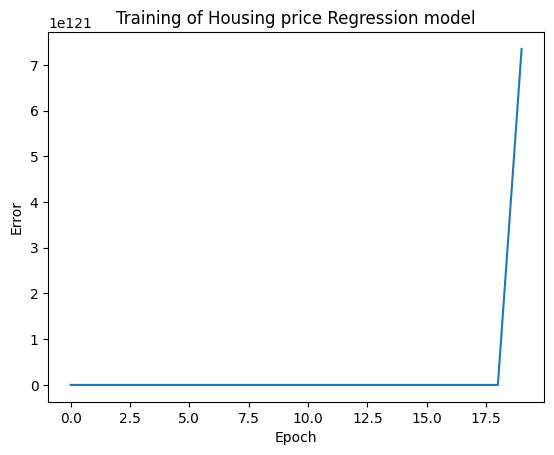

In [23]:
# Let's do an exploratory plot
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Housing price Regression model');

In [33]:
def gradient_descent_scaling(training_data, thetas, alpha=5e-3):
    '''
    training_data: training dataset
    thetas: theta0, theta1, ..., thetaj
    alpha: learning rate, default to 0.0005
    
    returns: 
            - thetas: the updated thetas
            - total_error: total error (note, not loss) from 
    '''
    
    total_error = 0
    overall_gradients = np.zeros(3)

    # compute the summation of gradients across all training 
    for ex in training_data:
        # print ("before scalling",ex[0],ex[1],np.min(training_data[0]),np.max(training_data[0]))
        ex[0] = (ex[0]-np.min(training_data[0]))/(np.max(training_data[0])-np.min(training_data[0]))
        # print ("after scalling",ex[0],ex[1])
        ex[1] = ex[1]-np.min(training_data[1])/(np.max(training_data[1])-np.min(training_data[1]))
        ex[2] = ex[2]-np.min(training_data[2])/(np.max(training_data[2])-np.min(training_data[2]))
        gradients = calculate_single_forward_2(thetas, ex)
        # gradients[0] is the error term (gradients[0] = erro
        total_error += gradients[0]
        overall_gradients+=  gradients

    # update thetas
    theta_0, theta_1,theta_2 = thetas
    thetas[0] = theta_0 - alpha * overall_gradients[0]
    thetas[1] = theta_1 - alpha * overall_gradients[1]
    thetas[2] = theta_2 - alpha * overall_gradients[2]

    return thetas, total_error

In [34]:
# set initial parameters
thetas = [3.44, 2.13, 1.13]
old_thetas = thetas.copy()
alpha = 5e-3

# prepare training
total_epochs = 20
error_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent_scaling(housing_price_regr_data, thetas, alpha)
    # store a history of errors
    error_traj[epoch] = epoch_error

0.0 2.999445319720268 -399893.1706267887
3.657117830510364e-115 2.9994544118139186 -329893.17061651463
5.485683264518348e-115 2.9994544134677104 -368993.17061651277
3.23654778068853e-115 1.9994544134677097 -231994.30061651277
6.857107340024326e-115 3.9994544134677104 -539892.0406165128
4.537114945626699e-115 3.9994544134677104 -299892.04061651276
3.5062611822047064e-115 2.9994544134677104 -314893.17061651277
3.26169055540614e-115 2.9994544134677104 -198992.17061651277
3.1542623361581713e-115 2.9994544134677104 -211993.17061651277
3.4148329105043083e-115 2.9994544134677104 -242493.17061651277
4.434258139963752e-115 3.9994544134677104 -239991.0406165128
4.57140054751435e-115 2.9994544134677104 -346993.17061651277
4.319972800338253e-115 2.9994544134677104 -329992.17061651277
1.0235381979354054e-114 4.999454413467714 -699890.9106165128
2.898263175397054e-115 2.9994544134677104 -259893.17061651277
5.257112585267355e-115 3.9994544134677104 -449892.04061651276
3.017119928607573e-115 1.9994544

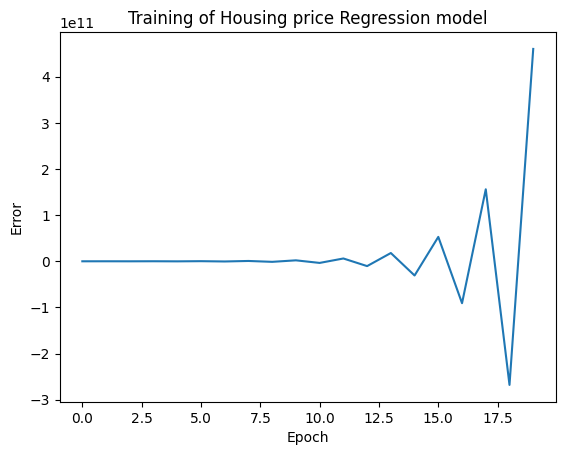

In [35]:
# Let's do an exploratory plot
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Housing price Regression model');